In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
%%time
df=pd.read_csv('finalTrain.csv')


Wall time: 177 ms


In [4]:
df1=pd.read_csv('finalTrain.csv')


In [5]:
df.shape

(45584, 20)

- **DATA INFO**

**Delivery_person_ID** : ID of delivery person

Delivery_person_Age: Age

Delivery_person_Ratings: Ratings he got from customers

Restaurant_latitude: Latitude value where Restaurant is located

Restaurant_longitude: Longitude value for the restaurant

Delivery_location_latitude : Latitude for location where food is going to be delivered

Delivery_location_longitude: Longitude for delivery location

Order_Date: when food was delivered

Time_Orderd at what time order was placed

Time_Order_picked what time it was picked from restaurant

Weather_conditions: how is the weather

Road traffic_density: how is the traffic Vehicle_condition: it is good or bad

Type_of_order: snacks, meals

Type_of_vehicle: bike, scooter, electric scooter, bicycle

multiple deliveries: 1, 2,3

Festival: yes or no

City: Metropolitian, urban, semi urban

Time taken (min): time taken by the person to deliver (target)

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43730.0,29.566911,5.815064,15.000000,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43676.0,4.633774,0.334744,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,45584.0,17.017948,8.185674,-30.905562,12.933284,18.551440,22.728163,30.914057
Restaurant_longitude,45584.0,70.229684,22.885575,-88.366217,73.170000,75.897963,78.044095,88.433452
Delivery_location_latitude,45584.0,17.465480,7.335562,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45584.0,70.844161,21.120578,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45584.0,1.023385,0.839055,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44591.0,0.744635,0.572510,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken (min),45584.0,26.293963,9.384298,10.000000,19.000000,26.000000,32.000000,54.000000


In [9]:
df.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [11]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

# Cleaning data

#### Time_Orderd

In [12]:
df['Time_Orderd'].value_counts()

21:55          461
17:55          456
0.833333333    449
22:20          448
21:35          446
              ... 
14:30           57
14:15           56
0.666666667     53
13:20           52
16:30           51
Name: Time_Orderd, Length: 176, dtype: int64

In [13]:
print(len(df[~df['Time_Orderd'].astype(str).str.contains(':')])/len(df)*100)

#Only 12% of the data is not in format so converting them into null values and then treating null values
df['Time_Orderd'][~df['Time_Orderd'].astype(str).str.contains(':')] = np.nan

12.721568971568972


#### Time_Order_picked

In [14]:
df['Time_Order_picked'].value_counts()

21:30    495
22:50    474
22:40    458
18:40    457
17:55    456
        ... 
08:15     48
16:15     46
16:10     43
17:10     39
16:20     38
Name: Time_Order_picked, Length: 193, dtype: int64

In [15]:
print(len(df[~df['Time_Order_picked'].astype(str).str.contains(':')])/len(df)*100)

df['Time_Order_picked'][~df['Time_Order_picked'].astype(str).str.contains(':')]= np.nan
# Only 9% of the data is not in format so converting them into null values and then treating null values

9.053615303615302


#### Order_Date

In [16]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

In [ ]:
# converted to date format

# EDA

## Function for Numerical Columns:
- 5 Point Summary
- Skewness
- Number of Outliers
- Univariate
- Bivariate
- Statistical Analysis
   - Two Sample Independent T Test
   - ANOVA Test

## Function for Categorical Columns:
- Number of Unique Categories
- Number and Percentage of Missing Values
- Univariate
- Bivariate
- Statistical Analysis
  - Chi Square Contingency Test

In [17]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [17]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

### skewness & kurtosis

In [18]:
# -<0 left skewed
# -=0 normally distributed/symetric distribution
# ->0 right skewed

df.skew()

Delivery_person_Age            0.018772
Delivery_person_Ratings       -2.493402
Restaurant_latitude           -1.361648
Restaurant_longitude          -3.219778
Delivery_location_latitude    -0.701183
Delivery_location_longitude   -2.956022
Vehicle_condition              0.071830
multiple_deliveries            0.324871
Time_taken (min)               0.486086
dtype: float64

-  None of them is highly skew so no need for transformation for now

In [19]:
# -<0 platykurtic
# -=0 mesokurtic
# ->0 leptokurtic

df.kurt()

Delivery_person_Age            -1.058167
Delivery_person_Ratings        15.668238
Restaurant_latitude             3.713309
Restaurant_longitude           10.300249
Delivery_location_latitude      0.264278
Delivery_location_longitude     7.102195
Vehicle_condition              -1.314918
multiple_deliveries             0.908879
Time_taken (min)               -0.310818
dtype: float64

# Treating Null Values 

In [22]:
pd.DataFrame({'Count':df.isnull().sum(),
             'Percentage':df.isnull().sum()*100/df.isnull().count()},
             index=df.columns).sort_values(by='Percentage', ascending=False)

,Count,Percentage
Time_Orderd,5799,12.721569
Time_Order_picked,4127,9.053615
Delivery_person_Ratings,1908,4.185679
Delivery_person_Age,1854,4.067217
City,1200,2.632503
multiple_deliveries,993,2.178396
Weather_conditions,616,1.351351
Road_traffic_density,601,1.318445
Festival,228,0.500176
Type_of_vehicle,0,0.000000


In [23]:
for i in df.select_dtypes(include=np.number):
    df[i]=df[i].fillna(df[i].median())

for i in df.select_dtypes(exclude=np.number):
    df[i]=df[i].fillna(df[i].mode()[0])
        

In [24]:
df.isnull().sum().sum()

0

## Visualization

In [25]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

Delivery_person_Age


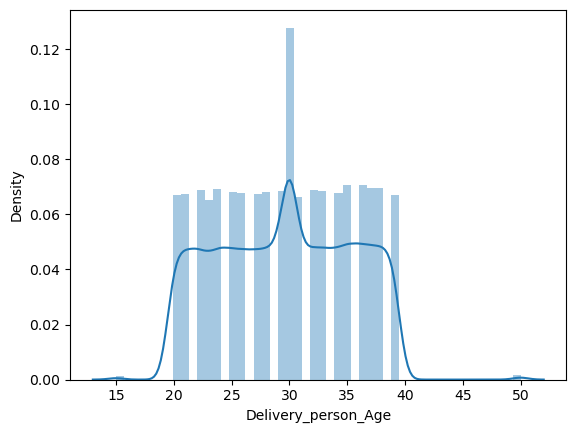

Delivery_person_Ratings


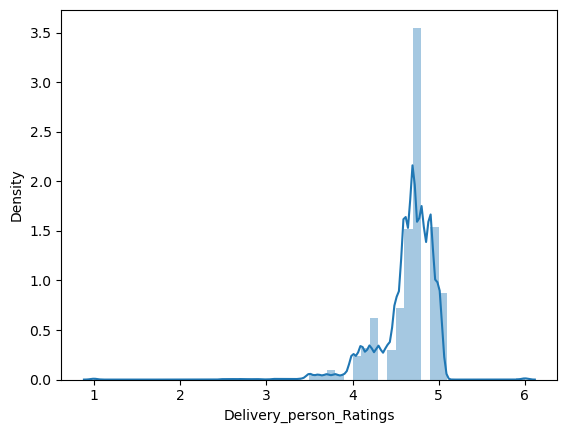

Restaurant_latitude


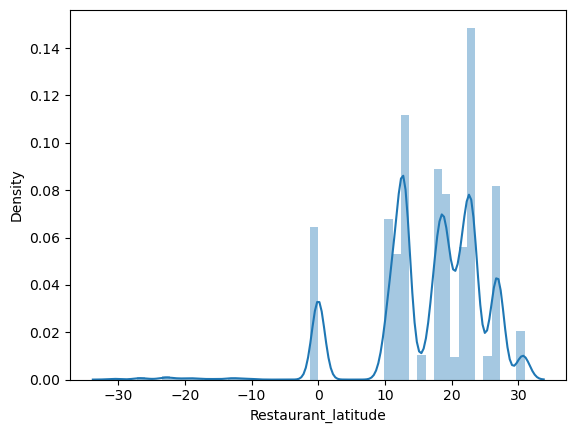

Restaurant_longitude


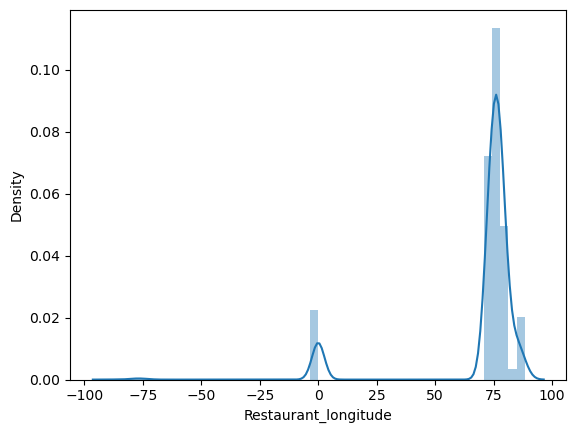

Delivery_location_latitude


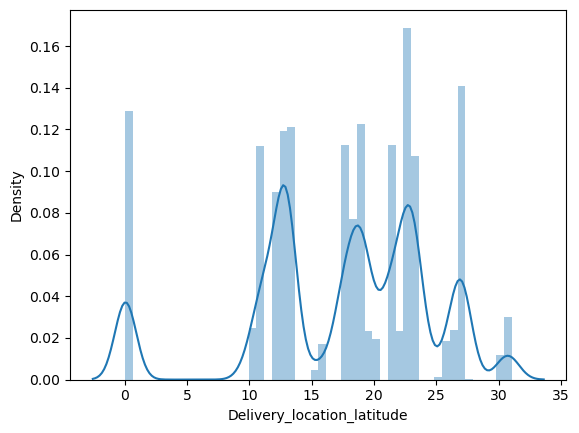

Delivery_location_longitude


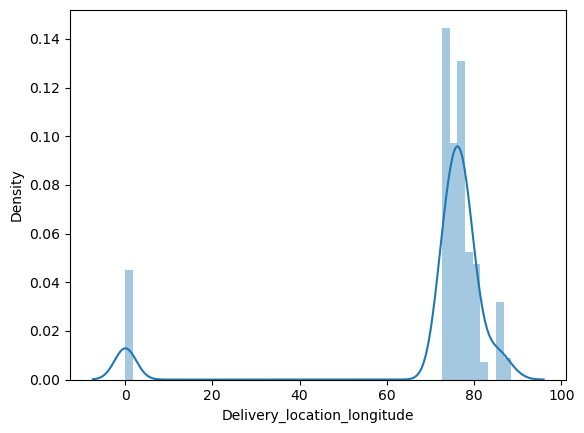

Vehicle_condition


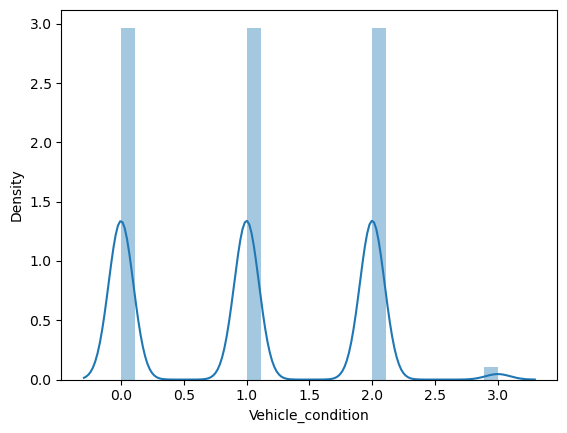

multiple_deliveries


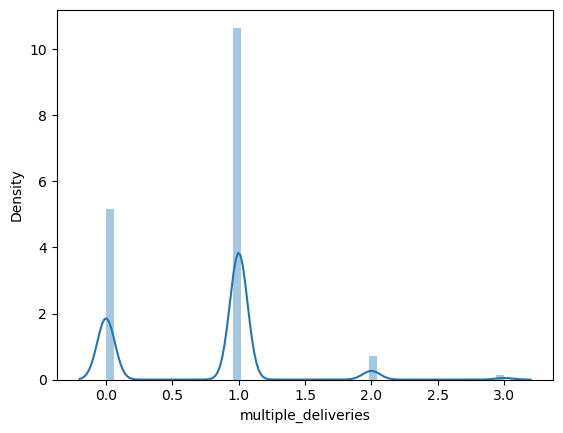

Time_taken (min)


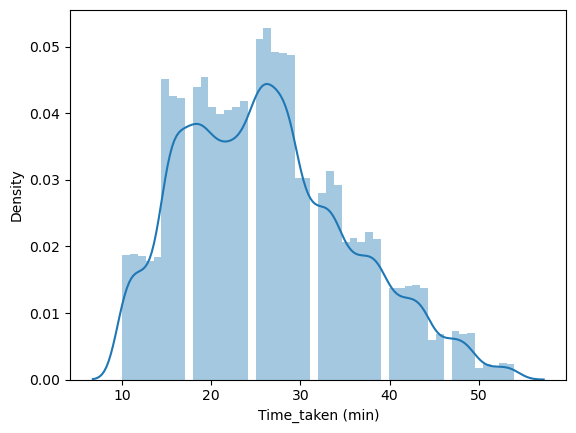

In [26]:
for i in df.select_dtypes(np.number):
    sns.distplot(df[i])
    print(i)
    plt.show()

Delivery_person_Age


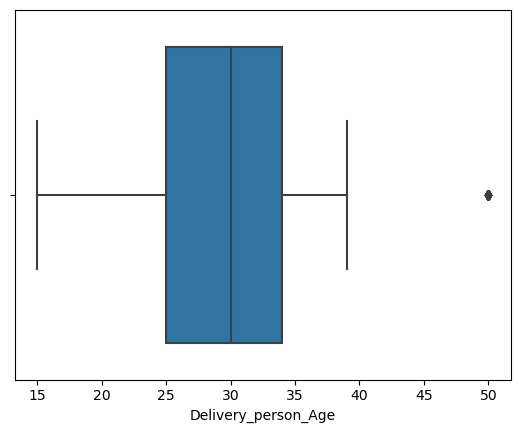

Delivery_person_Ratings


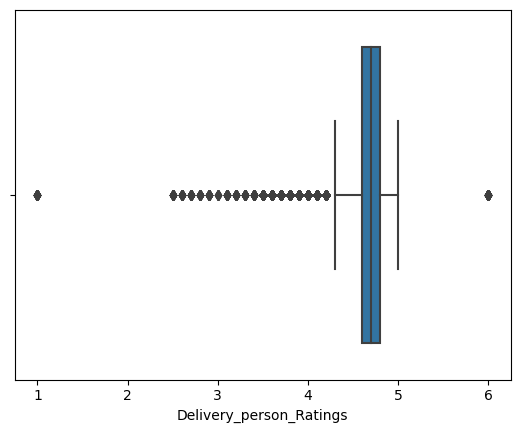

Restaurant_latitude


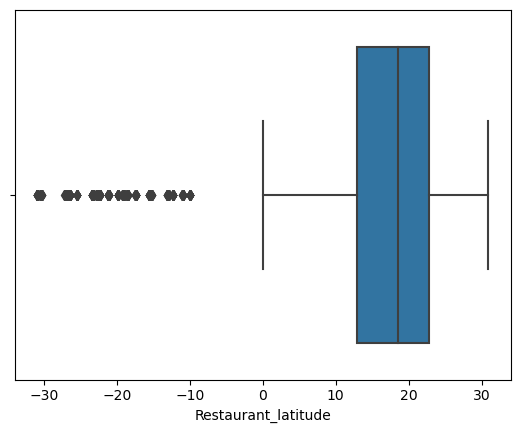

Restaurant_longitude


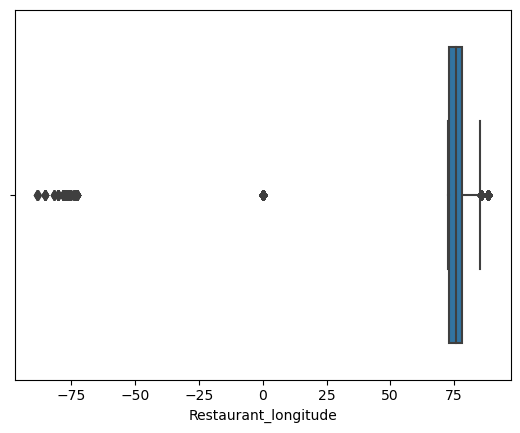

Delivery_location_latitude


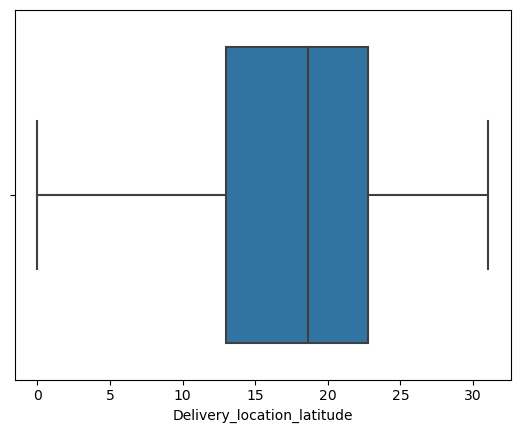

Delivery_location_longitude


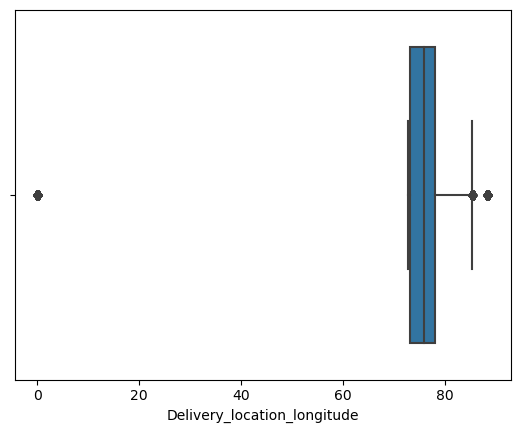

Vehicle_condition


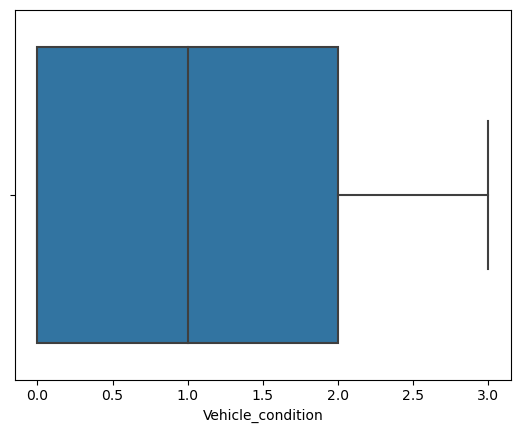

multiple_deliveries


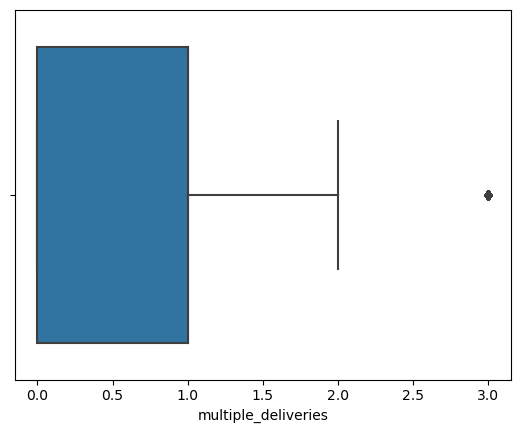

Time_taken (min)


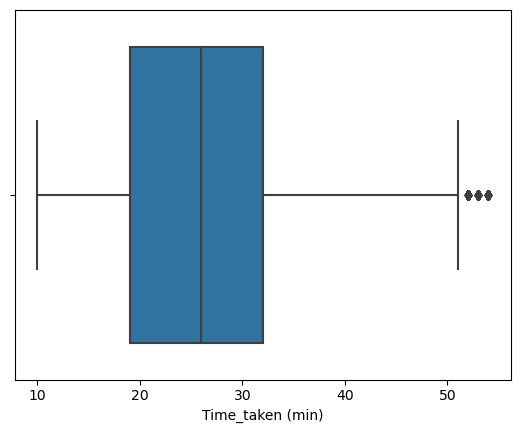

In [27]:
for i in df.select_dtypes(np.number):
    sns.boxplot(df[i])
    print(i)
    plt.show()

In [28]:
df.select_dtypes(exclude=np.number).columns

Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [29]:
df['Weather_conditions'].value_counts()

Fog           8269
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64

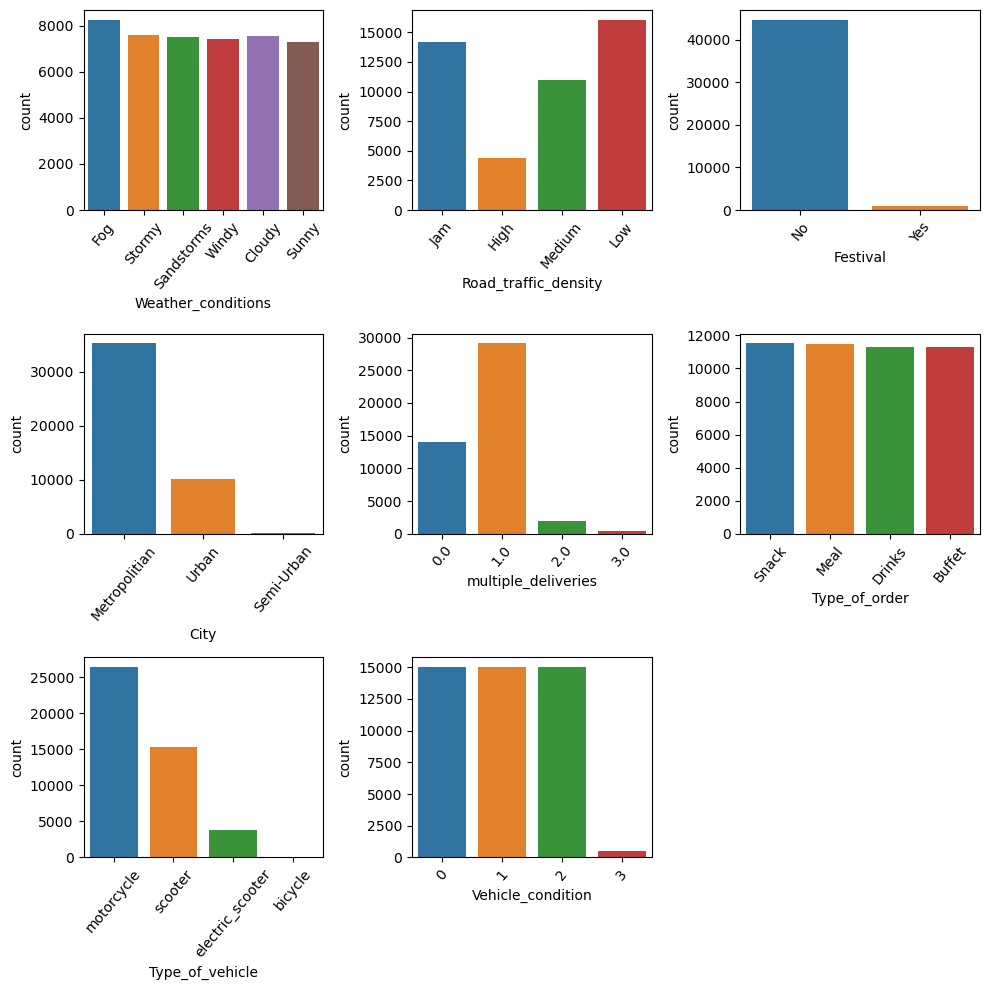

In [34]:
# Plotting the categorical columns
catcols = ['Weather_conditions', 'Road_traffic_density','Festival', 'City','multiple_deliveries','Type_of_order','Type_of_vehicle','Vehicle_condition']


r = 1
plt.figure(figsize=(10,10))
for i in catcols:
    plt.subplot(3,3,r)
    sns.countplot(x=df[i])
    plt.xticks(rotation=50)
    r += 1
plt.tight_layout()
plt.show()

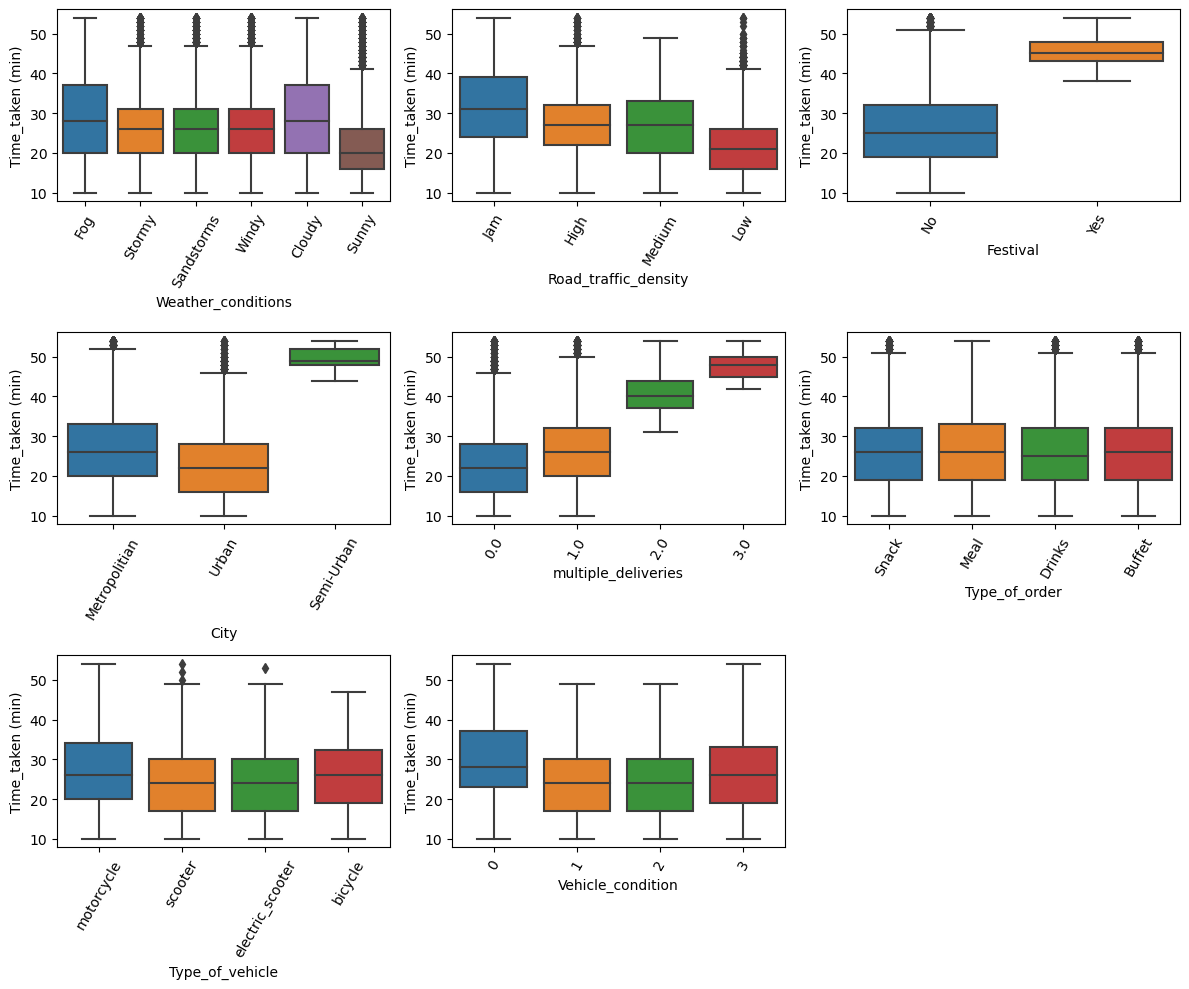

In [49]:
t = 1
plt.figure(figsize=(12,10))
for i in catcols:
    plt.subplot(3,3,t)
    sns.boxplot(x=df[i],y=df['Time_taken (min)'])
    plt.xticks(rotation=60)
    t += 1
plt.tight_layout()
plt.show()

## Time_taken vs categorycal feature 

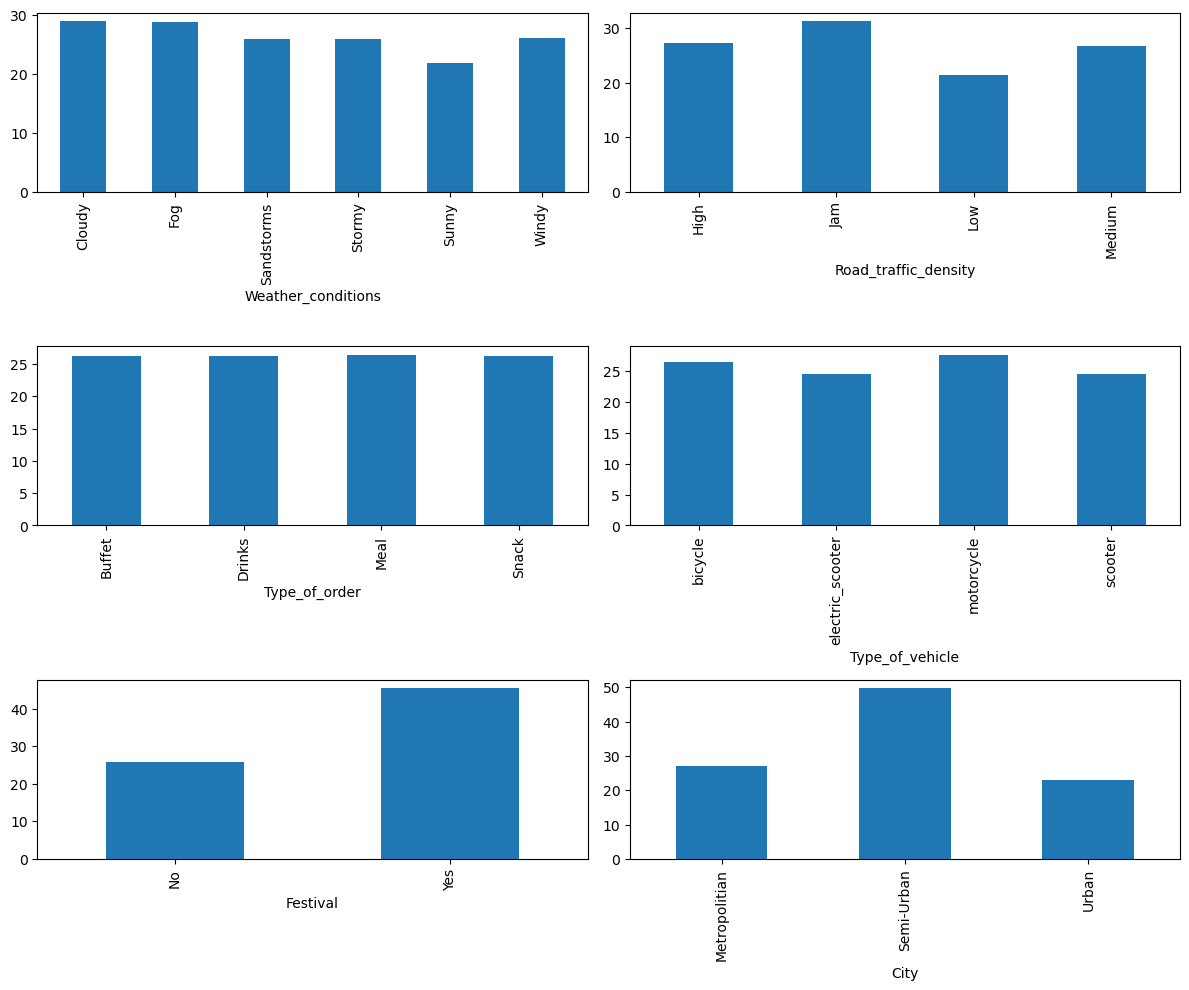

In [28]:
t = 1
plt.figure(figsize=(12,10))
for i in ['Weather_conditions', 'Road_traffic_density','Type_of_order', 'Type_of_vehicle', 'Festival', 'City']:
    plt.subplot(3,2,t)
    (df.groupby(i)['Time_taken (min)'].mean()).plot(kind='bar')
    t += 1
plt.tight_layout()
plt.show()

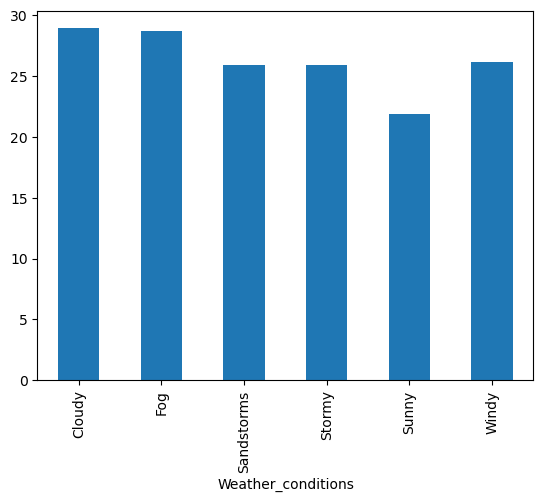

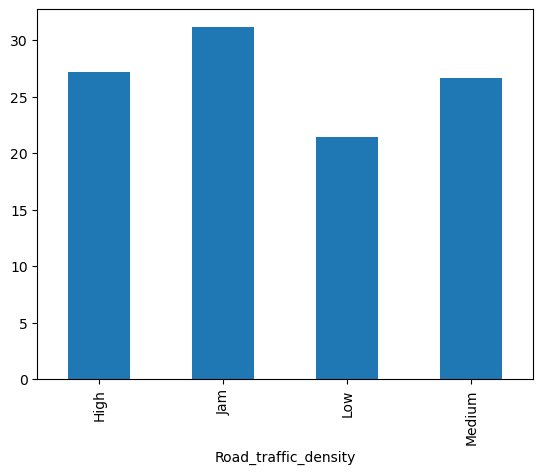

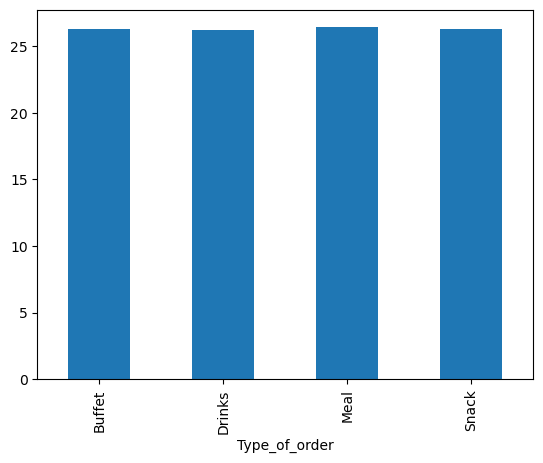

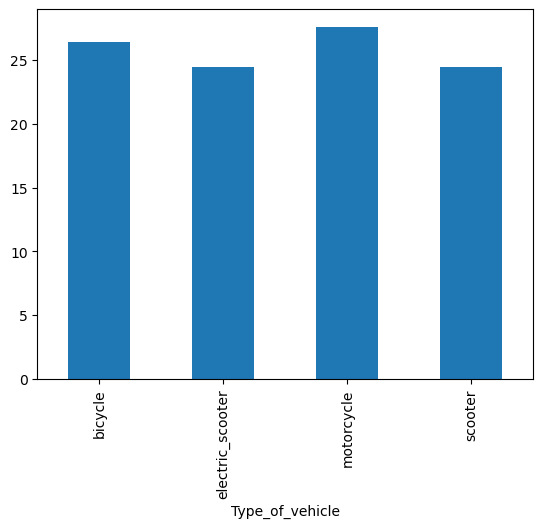

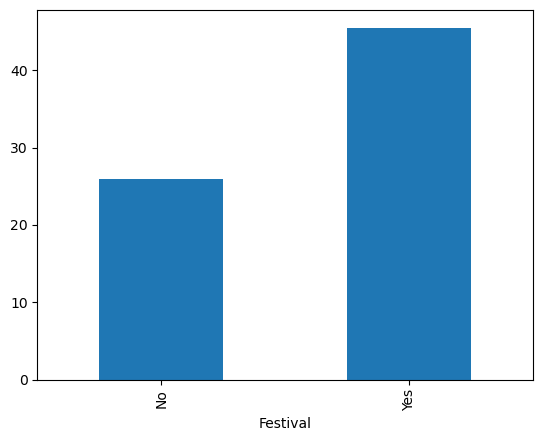

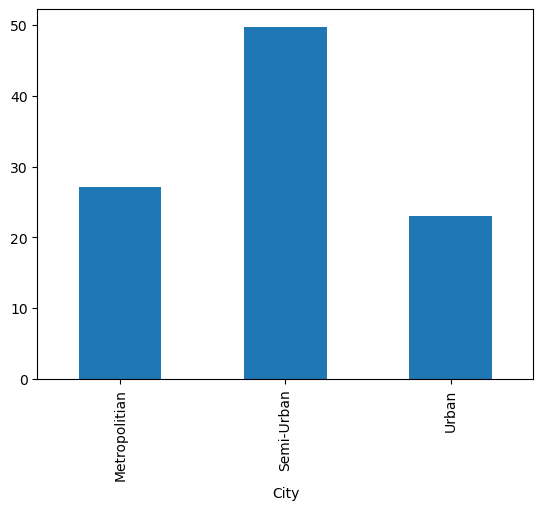

In [59]:
for i in ['Weather_conditions', 'Road_traffic_density','Type_of_order', 'Type_of_vehicle', 'Festival', 'City']:
    (df.groupby(i)['Time_taken (min)'].mean()).plot(kind='bar')
    plt.show()



## HeatMap Correlation

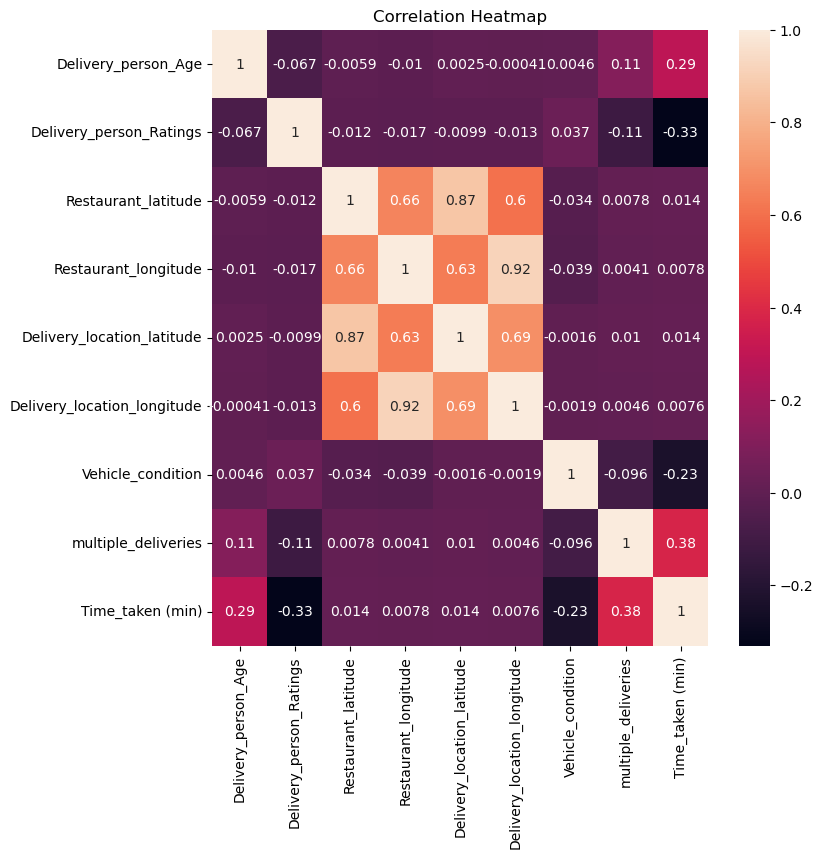

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
#latitude have co-relation

# Statistical Analysis
Perform statistical hypothesis testing on features to get an idea of whether features are impacting the target variables

In [45]:
df.select_dtypes(exclude=np.number).columns

Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

### Categorical Features vs. Numerical Target Variable (ANOVA )

In [59]:
from scipy.stats import f_oneway

# Assuming 'data' is your dataset
categories = ['Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']

for category in categories:
    group_data = [df[df[category] == value]['Time_taken (min)'] for value in df[category].unique()]
    f_statistic, p_value = f_oneway(*group_data)
    if p_value < 0.05:
        print(f"{category}:  p-value = {p_value} ", 'has a significant impact on time ')
    else :
        
        print(f"{category}:  p-value = {p_value} ", 'has no a significant impact on time ')


Weather_conditions:  p-value = 0.0  has a significant impact on time 
Road_traffic_density:  p-value = 0.0  has a significant impact on time 
Type_of_order:  p-value = 0.32647734096366016  has no a significant impact on time 
Type_of_vehicle:  p-value = 1.8869723946415702e-270  has a significant impact on time 
Festival:  p-value = 0.0  has a significant impact on time 
City:  p-value = 0.0  has a significant impact on time 


### Numerical Features vs. Numerical Target Variable 
### Chi-squared Test (for Binary Predictors)::

In [64]:
from scipy.stats import chi2_contingency

binary_predictors = ['multiple_deliveries', 'Vehicle_condition']
alpha = 0.05

for predictor in binary_predictors:
    contingency_table = pd.crosstab(df[predictor], df['Time_taken (min)'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    if p < alpha:
        print(f"Chi-squared = {chi2}, p-value = {p}")
        print("Reject the null hypothesis: There is a significant association.")
    else:
        print(f"Chi-squared = {chi2}, p-value = {p}")
        print("Fail to reject the null hypothesis: There is no significant association.")

Chi-squared = 16279.801788605257, p-value = 0.0
Reject the null hypothesis: There is a significant association.
Chi-squared = 5161.178088722372, p-value = 0.0
Reject the null hypothesis: There is a significant association.


# Building a Baseline Model with Raw Features

In [68]:
df.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [69]:
x=df.select_dtypes(include=np.number).drop(columns=['Time_taken (min)'])
y=df['Time_taken (min)']

In [70]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
xc=sma.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,random_state=10,test_size=0.3)
ols_model=sma.OLS(ytrain,xtrain).fit()
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Time_taken (min)   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     1861.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:56:55   Log-Likelihood:            -1.1048e+05
No. Observations:               31908   AIC:                         2.210e+05
Df Residuals:                   31899   BIC:                         2.210e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          48.9683      0.688     71.134      0.000      47.619      50.318
Delivery_person_Age             0.3943      0.008     51.641      0.000       0.379       0.409
Delivery_person_Ratings        -7.7362      0.132    -58.624      0.000      -7.995      -7.478
Restaurant_latitude             0.0005      0.013      0.036      0.971      -0.025       0.025
Restaurant_longitude           -0.0191      0.006     -3.376      0.001      -0.030      -0.008
Delivery_location_latitude      0.0147      0.015      1.002      0.316      -0.014       0.044
Delivery_location_longitude     0.0151      0.006      2.404      0.016       0.003       0.027
Vehicle_condition              -2.1776      0.052    -41.985      0.000      -2.279      -2.076
multiple_deliveries             4.9704      0.077     64.235      0.000       4.819       5.122
==============================================================================
Omnibus:                     1117.951   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1238.235
Skew:                           0.480   Prob(JB):                    1.32e-269
Kurtosis:                       3.095   Cond. No.                     1.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Engg

## Calculating Distance (using latitude)

#### Folium is a Python library used for visualizing geospatial data

In [71]:
import folium

In [72]:
def create_map(i, df):
    map_1 = folium.Map(location=[df.loc[i]['Restaurant_latitude'], df.loc[i]['Restaurant_longitude']])
    folium.Marker([df.loc[i]['Restaurant_latitude'], df.loc[i]['Restaurant_longitude']], popup='<i>Restaurant</i>', tooltip='Restaurant').add_to(map_1)
    folium.Marker([df.loc[i]['Delivery_location_latitude'], df.loc[i]['Delivery_location_longitude']], popup='<i>Delivery Location</i>', tooltip='Delivery Location', icon=folium.Icon(color='red')).add_to(map_1)
    folium.PolyLine(locations=[[df.loc[i]['Restaurant_latitude'], df.loc[i]['Restaurant_longitude']], [df.loc[i]['Delivery_location_latitude'], df.loc[i]['Delivery_location_longitude']]], color='blue').add_to(map_1)
    return map_1


In [73]:
create_map(2, df)


### Adding Trip Distance as a feature

The Earth is round but big, so we can consider it flat for short distances. However, flat-Earth formulas for calculating the distance between two points start showing noticeable errors when the distance is more than about 20 kilometers

Therefore, calculating distances on a sphere needs to consider spherical geometry

The haversine formula is a very accurate way of computing distances between two points on the surface of a sphere using the latitude and longitude of the two points

![](haversine.PNG)

#### Haversine Formula 

The word "Haversine" comes from the function: __haversine(θ) = sin²(θ/2)__

We can further derive the following:

__a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)__

__c = 2 * atan2( √a, √(1−a) )__

__d = R ⋅ c__

The following equation where,

- __φ is latitude__
- __λ is longitude__
- __R is earth’s radius__ 
- __d is the haversine distance__

Note that angles need to be in radians to pass to trig functions

Source: https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula

In [74]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculate the distance
    distance = R * c
    return distance
df['Distance']=df.apply(lambda row: haversine_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [76]:
df['Distance'].head(4)

0    10.280582
1     6.242319
2    13.787860
3     2.930258
Name: Distance, dtype: float64

In [77]:
mask = df['Distance'] > 100 #droping as it is not correct 
df=df[~mask]

In [78]:
df.shape

(45153, 21)

#  Experimenting with Manhattan Distance as a feature


Based on the gridlike street geography of the New York borough of Manhattan.

The distance between two points measured along axes at right angles. 


In a plane with __$p_1$__ at __($x_1, y_1$)__ and __$p_2$__ at __($x_2, y_2$)__,

Manhattan Distance, __M = |$x_1 - x_2$| + |$y_1 - y_2$|__



In [79]:
def manhattan_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Calculate the Manhattan distance
    distance = abs(lat2 - lat1) + abs(lon2 - lon1)
    return distance

df['manh_distance']=df.apply(lambda row: haversine_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [80]:
pd.set_option('display.max_columns', None)

In [81]:
df=df.drop(columns=['ID','Delivery_person_ID'])

<AxesSubplot:xlabel='manh_distance', ylabel='Density'>

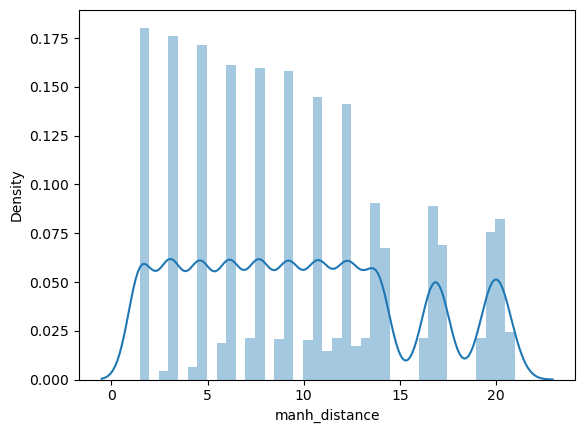

In [82]:
sns.distplot(df['manh_distance'])

<AxesSubplot:xlabel='Distance', ylabel='Density'>

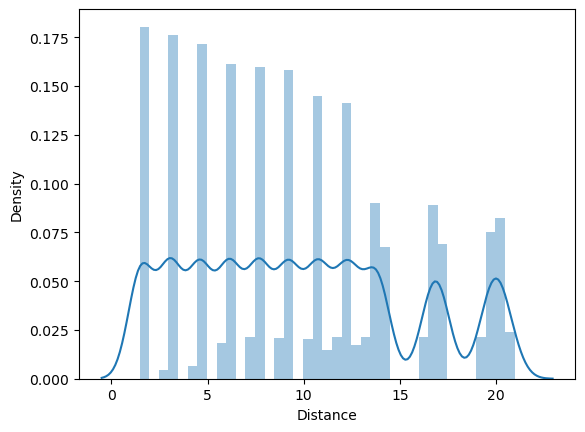

In [83]:
sns.distplot(df['Distance'])

In [84]:
df[df['manh_distance']==df['Distance']]  # not same

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance,manh_distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,1.489846,1.489846
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,11.007735,11.007735
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,4.657195,4.657195
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,6.232393,6.232393


##### as we Calculated distance droping latitude

In [98]:
df=df.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])

In [86]:
# Some extra feature engg

In [87]:
df['Order_Hour']=df['Time_Orderd'].str.split(':').str[0]
df['Order_Min']=df['Time_Orderd'].str.split(':').str[1]

In [88]:
df['Picked_Hour']=df['Time_Order_picked'].str.split(':').str[0]
df['Picked_Min']=df['Time_Order_picked'].str.split(':').str[1]

In [102]:
df=df.drop(columns=['Time_Orderd','Time_Order_picked']) # droping as we extract feature

In [89]:
df['Picked_Hour']=df['Picked_Hour'].astype(int)
df['Picked_Min']=df['Picked_Min'].astype(int)
df['Order_Hour']=df['Order_Hour'].astype(int)
df['Order_Min']=df['Order_Min'].astype(int)

In [90]:
df['day']=df['Order_Date'].dt.day
df['month']=df['Order_Date'].dt.month
df['year']=df['Order_Date'].dt.year

In [100]:
df=df.drop(columns=['Order_Date']) # droping as we extract feature

# Encoding

In [91]:
df1['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [92]:
Weather_conditions_Map={"Sunny":1,"Windy":3,"Sandstorms":4,"Stormy":4,"Fog":3,"Cloudy":2}
Road_Traffic_Map={"Low":1,"Medium":2,"High":3,"Jam":4}
Type_of_vehicle_map={"scooter":1,"electric_scooter":1,"bicycle":2,"motorcycle":2}
Festival_Map={"No":0,"Yes":1}
City_Map={"Urban":2,"Metropolitian":3,"Semi-Urban":1}
#Metropolitan areas have the most traffic, followed by urban areas and semi-urban areas.


df['Weather_conditions']=df['Weather_conditions'].replace(Weather_conditions_Map)
df['Road_traffic_density']=df['Road_traffic_density'].replace(Road_Traffic_Map)
df['Type_of_vehicle']=df['Type_of_vehicle'].map(Type_of_vehicle_map)
df['Festival']=df['Festival'].map(Festival_Map)
df['City']=df['City'].map(City_Map)

### One-hot encoding for 'Type_of_order'

In [127]:
df=pd.get_dummies(df,drop_first=True)

# Building a Baseline Model with all Features

In [128]:
x=df.drop(columns=['Time_taken (min)','manh_distance'])
y=df['Time_taken (min)']

In [129]:
x

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Order_Hour,Order_Min,Picked_Hour,Picked_Min,day,month,year,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,36.0,4.2,3,4,2,2,3.0,0,3,10.280582,21,55,22,10,2,12,2022,0,0,1
1,21.0,4.7,4,3,1,2,1.0,0,3,6.242319,14,55,15,5,13,2,2022,0,1,0
2,23.0,4.7,4,2,1,1,1.0,0,3,13.787860,17,30,17,40,3,4,2022,1,0,0
3,34.0,4.3,4,1,0,2,0.0,0,3,2.930258,9,20,9,30,13,2,2022,0,0,0
4,24.0,4.7,3,4,1,1,1.0,0,3,19.396618,19,50,20,5,14,2,2022,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,3,3,1,2,0.0,0,3,1.489846,11,35,11,45,24,3,2022,0,1,0
45580,21.0,4.6,3,4,0,2,1.0,0,3,11.007735,19,55,20,10,16,2,2022,0,0,0
45581,30.0,4.9,2,1,1,1,0.0,0,3,4.657195,23,50,24,5,3,11,2022,1,0,0
45582,20.0,4.7,2,3,0,2,1.0,0,3,6.232393,13,35,13,40,3,7,2022,0,0,1


In [130]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
xc=sma.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,random_state=10,test_size=0.3)
ols_model=sma.OLS(ytrain,xtrain).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Time_taken (min)   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1854.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:10:11   Log-Likelihood:            -1.0382e+05
No. Observations:               31607   AIC:                         2.077e+05
Df Residuals:                   31587   BIC:                         2.079e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Delivery_person_Age         0.3983      0.006     61.764      0.000       0.386       0.411
Delivery_person_Ratings    -6.6449      0.114    -58.433      0.000      -6.868      -6.422
Weather_conditions          0.6388      0.034     18.527      0.000       0.571       0.706
Road_traffic_density        2.2965      0.030     75.760      0.000       2.237       2.356
Vehicle_condition          -2.0133      0.056    -36.150      0.000      -2.122      -1.904
Type_of_vehicle             0.4610      0.094      4.916      0.000       0.277       0.645
multiple_deliveries         3.4782      0.067     52.134      0.000       3.347       3.609
Festival                   11.1187      0.271     41.100      0.000      10.588      11.649
City                        1.6265      0.085     19.044      0.000       1.459       1.794
Distance                    0.3842      0.008     46.004      0.000       0.368       0.401
Order_Hour                 -0.0525      0.015     -3.399      0.001      -0.083      -0.022
Order_Min                   0.0108      0.002      4.481      0.000       0.006       0.016
Picked_Hour                -0.1000      0.015     -6.477      0.000      -0.130      -0.070
Picked_Min                 -0.0064      0.002     -2.616      0.009      -0.011      -0.002
day                         0.0037      0.004      0.850      0.395      -0.005       0.012
month                       0.0317      0.014      2.216      0.027       0.004       0.060
year                        0.0152      0.000     43.364      0.000       0.015       0.016
Type_of_order_Drinks       -0.0794      0.103     -0.770      0.441      -0.281       0.123
Type_of_order_Meal         -0.0172      0.103     -0.166      0.868      -0.219       0.185
Type_of_order_Snack         0.0102      0.103      0.100      0.921      -0.191       0.212
==============================================================================
Omnibus:                      589.619   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.344
Skew:                           0.328   Prob(JB):                    3.60e-137
Kurtosis:                       3.216   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Assumptions of the Linear Regression

### 1. Normality of Residuals

In [131]:
from scipy.stats import jarque_bera
resid = ols_model.resid
jarque_bera(resid)

Jarque_beraResult(statistic=628.3442934922479, pvalue=0.0)

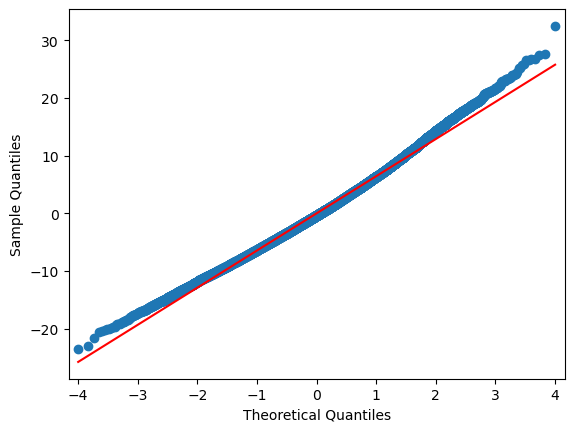

In [132]:
from statsmodels.graphics.gofplots import qqplot

resid = ols_model.resid
qqplot(resid,line='r')
plt.show()

-  the data is not normal

### 2.Detecting Autocorrelation

In [133]:
sma.stats.stattools.durbin_watson(ols_model.resid)

1.9872327685114735


 
DW Statistic ≈ 2: This indicates little to no autocorrelation in the residuals. In other words, the residuals are approximately uncorrelated with each other.

DW Statistic < 2: This suggests positive autocorrelation in the residuals. The residuals tend to be positively correlated with their lagged values.

DW Statistic > 2: This suggests negative autocorrelation in the residuals. The residuals tend to be negatively correlated with their lagged values.


    -  Based on Durbin Watson score, we can conclude that there is no autocorrelation*
    

### 3.Detecting Heteroskedasticity

In [134]:
# H0: The residuals are homoskedastic
# H1: The residuals are not homoskedastic
    
from statsmodels.stats.diagnostic import het_breuschpagan
_,_,_,p = het_breuschpagan(resid,xtrain)
p<0.05

True

In [135]:
# Since p value is less than 0.05, there is hetroscedasticity

### 4.Multicolinearity VIF

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
pd.DataFrame({'Vif':vif,'Columns':xtrain.columns}).sort_values('Vif', ascending=False).head(10)

,Vif,Columns
16,379.853092,year
12,3.561304,Picked_Hour
10,3.483606,Order_Hour
9,1.665422,Distance
4,1.633311,Vehicle_condition
5,1.617791,Type_of_vehicle
19,1.509486,Type_of_order_Snack
17,1.506221,Type_of_order_Drinks
18,1.505194,Type_of_order_Meal
15,1.321425,month


In [137]:
# only const has Multicolinearit

### 5.Linearity Assumption

In [138]:
# H0: Data has Linear Relationship with the Target Variable.
# H1: Data has non Linear releationship with target variable

In [139]:
rainbow_statistic, p = sma.stats.linear_rainbow(ols_model)

if p < 0.05:
    print("Reject the null hypothesis: Nonlinearity is present in the model.")
else:
    print("Fail to reject the null hypothesis: Data has Linear Relationship with the Target Variable..")

Fail to reject the null hypothesis: Data has Linear Relationship with the Target Variable..


# Model

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer

In [141]:
x=df.drop(columns=['Time_taken (min)','manh_distance'])
y=df['Time_taken (min)']

### StandardScaler

In [160]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [161]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.3)

In [162]:
%%time
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import time

# Initialize a list of regression models to test
models = [
    LinearRegression(), Ridge(), Lasso(), ElasticNet(),
    SGDRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

# Initialize empty lists to store results
model_names = []
train_r2_scores = []
test_r2_scores = []
train_rmse_values = []
test_rmse_values = []
train_times = []  # To store training times
test_times = []   # To store testing times

# Iterate through the models
for model in models:
    model_name = str(model).split('(')[0]  # Extract the model name
    
    # Measure training time
    train_start_time = time.time()
    model.fit(xtrain, ytrain)
    train_end_time = time.time()
    train_time = train_end_time - train_start_time
    train_times.append(train_time)

    # Measure testing time
    test_start_time = time.time()
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    test_end_time = time.time()
    test_time = test_end_time - test_start_time
    test_times.append(test_time)
    
    # Calculate R2 scores for train and test
    train_r2 = r2_score(ytrain, ypred_train)
    test_r2 = r2_score(ytest, ypred_test)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    
    # Calculate RMSE for train and test
    train_rmse = mean_squared_error(ytrain, ypred_train )**0.5
    test_rmse = mean_squared_error(ytest, ypred_test)**0.5
    train_rmse_values.append(train_rmse)
    test_rmse_values.append(test_rmse)
    
    model_names.append(model_name)

#DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Train R2': train_r2_scores,
    'Test R2': test_r2_scores,
    'Train RMSE': train_rmse_values,
    'Test RMSE': test_rmse_values,
    'Train Time (s)': train_times,
    'Test Time (s)': test_times  
})


Wall time: 1min 1s


### Haversine Distance result
As Harversine Dist is give good R2 and RMSE as compare to Manhattan Distance

In [163]:
results_df

,Model,Train R2,Test R2,Train RMSE,Test RMSE,Train Time (s),Test Time (s)
0,LinearRegression,0.527266,0.526591,6.461360,6.434888,0.014995,0.004011
1,Ridge,0.527266,0.526591,6.461360,6.434888,0.010507,0.005019
2,Lasso,0.457780,0.457693,6.919958,6.887239,0.011000,0.005004
3,ElasticNet,0.447899,0.448009,6.982722,6.948459,0.009998,0.004338
4,SGDRegressor,0.525865,0.525308,6.470931,6.443603,0.088586,0.005134
5,KNeighborsRegressor,0.721133,0.571077,4.962659,6.125087,0.002997,34.446845
6,DecisionTreeRegressor,1.000000,0.564082,0.000000,6.174830,0.301644,0.015999
7,RandomForestRegressor,0.968870,0.775307,1.658089,4.433205,17.091759,1.297561
8,AdaBoostRegressor,0.586291,0.588843,6.044538,5.996897,1.986791,0.216971
9,GradientBoostingRegressor,0.751836,0.750572,4.681498,4.670847,4.491043,0.125029


- **Going with XGBRegressor as giving over all best accuracy, RMSE and taking least amount of time for traing model and predicting target**

# Pipeline

- Checking if MinMaxScaler have any different effect than StandardScaler

In [154]:
x.skew() #skewwness is present for some features 

Delivery_person_Age       -0.003840
Delivery_person_Ratings   -2.422953
Weather_conditions        -0.506379
Road_traffic_density       0.238272
Vehicle_condition          0.055863
Type_of_vehicle           -0.332693
multiple_deliveries        0.299173
Festival                   6.927190
City                      -1.423757
Distance                   0.323756
Order_Hour                -1.005523
Order_Min                 -0.165865
Picked_Hour               -0.939576
Picked_Min                -0.161923
day                        0.399474
month                      1.485412
year                       0.000000
Type_of_order_Drinks       1.163527
Type_of_order_Meal         1.149055
Type_of_order_Snack        1.136199
dtype: float64

In [178]:
%%time
from sklearn.pipeline import Pipeline
 
x=df.drop(columns=['Time_taken (min)','manh_distance'])
y=df['Time_taken (min)']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.3)

pipe = Pipeline((
("mm",MinMaxScaler()),
("xg", XGBRegressor()),
))

pipe.fit(xtrain,ytrain)
print("Training R2",pipe.score(xtrain,ytrain))
print("Testing R2", pipe.score(xtest,ytest))

print('Test_RMSE',mean_squared_error(ytest,pipe.predict(xtest))**0.5)
print('Train_RMSE',mean_squared_error(ytrain,pipe.predict(xtrain))**0.5)

Training R2 0.8393037530793613
Testing R2 0.7782226856040195
Test_RMSE 4.4043437910385235
Train_RMSE 3.7671977092785696
Wall time: 1.43 s


In [ ]:
#MinMaxScaler is giving good acc as compare to StandardScaler so cont with minmaxscaler

# Fine tunning 

### GridSearchCV

It's a systematic approach to finding the best combination of hyperparameters for a given model by evaluating multiple combinations using cross-validation.

In [166]:
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV

In [170]:
xg.n_estimators,xg.max_leaves,xg.max_depth,xg.sampling_method

(100, None, None, None)

In [179]:
%%time
params = {'n_estimators':[200,500,800,100],
          'max_depth':[1,5,10],
          'learning_rate':[0.01,0.1,0.9]}

grid = RandomizedSearchCV(XGBRegressor(),param_distributions=params,cv = 2,scoring='neg_mean_squared_error')
grid.fit(xtrain,ytrain)
grid.best_params_

Wall time: 1min 18s


{'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01}

In [183]:
%%time

xg= XGBRegressor(**grid.best_params_)

xg.fit(xtrain,ytrain)
print("Training R2",xg.score(xtrain,ytrain))
print("Testing R2", xg.score(xtest,ytest))

print('Test_RMSE',mean_squared_error(ytest,xg.predict(xtest))**0.5)
print('Train_RMSE',mean_squared_error(ytrain,xg.predict(xtrain))**0.5)

Training R2 0.8493067089447632
Testing R2 0.7887277176252993
Test_RMSE 4.298767070487477
Train_RMSE 3.6480644744555137
Wall time: 14.8 s


In [184]:
%%time
params = {'n_estimators':[200,500,550,600,800],
          'max_depth':[10,11,15,20],
          'learning_rate':[0.01,0.021,0.09,0.001]}

grid = RandomizedSearchCV(XGBRegressor(),param_distributions=params,cv = 2,scoring='neg_mean_squared_error')
grid.fit(xtrain,ytrain)
grid.best_params_

Wall time: 6min 3s


{'n_estimators': 550, 'max_depth': 10, 'learning_rate': 0.021}

In [186]:
%%time
xg= XGBRegressor(**grid.best_params_)

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=pd.DataFrame(mm.fit_transform(x),columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.3)

xg_model=xg.fit(xtrain,ytrain)
print("Training R2",xg.score(xtrain,ytrain))
print("Testing R2", xg.score(xtest,ytest))

print('Test_RMSE',mean_squared_error(ytest,xg_model.predict(xtest))**0.5)
print('Train_RMSE',mean_squared_error(ytrain,xg_model.predict(xtrain))**0.5)

Training R2 0.8965307093970277
Testing R2 0.7857424071906631
Test_RMSE 4.329031660600694
Train_RMSE 3.0228826097982058
Wall time: 15.6 s


- **Here we can see nice improvement in R2,RMSE**

In [ ]:
#XGBRegressor	0.835826	0.778184	3.807740	4.404726	1.279144	0.032268  #old without GridSearchCV

# feature_importances_

Feature importance is calculated based on how often each feature is used in decision trees during training and how much they contribute to reducing impurity (e.g., mean squared error) in the target variable.
**It helps you identify which features are most influential in making predictions with the XGBoost model.**

In [187]:

features_cb = pd.DataFrame({'Importance':xg_model.feature_importances_,
                            'Features':xtrain.columns}).sort_values('Importance',ascending = False)

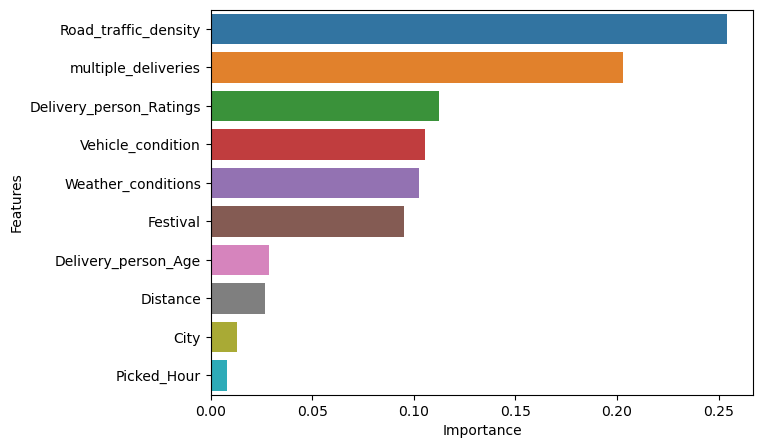

In [196]:
plt.figure(figsize=(7,5))
sns.barplot(x=features_cb['Importance'][:10],
            y=features_cb['Features'][:10])
plt.show()

In [207]:
features_cb['Features'][:6]

3       Road_traffic_density
6        multiple_deliveries
1    Delivery_person_Ratings
4          Vehicle_condition
2         Weather_conditions
7                   Festival
Name: Features, dtype: object

In [204]:
len(features_cb['Importance'])

20

# SFS

**It is a feature selection technique**.
It works by iteratively adding or removing features from the feature set and evaluating the model's performance (e.g., using cross-validation) at each step.

In [197]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector
xg=XGBRegressor(**grid.best_params_)
sfs_forward= SequentialFeatureSelector(estimator=xg,cv=2,k_features='best',forward=True,scoring='neg_mean_squared_error')
sfs_forward.fit(xtrain,ytrain)
sfs_forward.k_feature_names_

Wall time: 50min 39s


('Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weather_conditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'multiple_deliveries',
 'Festival',
 'City',
 'Distance',
 'Order_Min',
 'Picked_Hour',
 'day',
 'year',
 'Type_of_order_Drinks',
 'Type_of_order_Meal')

In [203]:
l=sfs_forward.k_feature_names_
len(l)

15

In [201]:
x=df[['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weather_conditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'multiple_deliveries',
 'Festival',
 'City',
 'Distance',
 'Order_Min',
 'Picked_Hour',
 'day',
 'year',
 'Type_of_order_Drinks',
 'Type_of_order_Meal']]
y=df['Time_taken (min)']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.3)

In [202]:
%%time
xg= XGBRegressor(**grid.best_params_)

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=pd.DataFrame(mm.fit_transform(x),columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.3)

xg_model=xg.fit(xtrain,ytrain)
print("Training R2",xg.score(xtrain,ytrain))
print("Testing R2", xg.score(xtest,ytest))

print('Test_RMSE',mean_squared_error(ytest,xg_model.predict(xtest))**0.5)
print('Train_RMSE',mean_squared_error(ytrain,xg_model.predict(xtrain))**0.5)

Training R2 0.886733545651495
Testing R2 0.7862218229712301
Test_RMSE 4.324185698477901
Train_RMSE 3.162759721197509
Wall time: 14.1 s


In [211]:
df.drop(columns=['Time_taken (min)','manh_distance']).columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Distance', 'Order_Hour',
       'Order_Min', 'Picked_Hour', 'Picked_Min', 'day', 'month', 'year',
       'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack'],
      dtype='object')

In [217]:
x=df[['Road_traffic_density','multiple_deliveries','Delivery_person_Ratings','Vehicle_condition',
    'Weather_conditions','Type_of_vehicle','Distance','Delivery_person_Age']]
y=df['Time_taken (min)']


xg= XGBRegressor(**grid.best_params_)

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=pd.DataFrame(mm.fit_transform(x),columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.3)

xg_model=xg.fit(xtrain,ytrain)
print("Training R2",xg.score(xtrain,ytrain))
print("Testing R2", xg.score(xtest,ytest))

print('Test_RMSE',mean_squared_error(ytest,xg_model.predict(xtest))**0.5)
print('Train_RMSE',mean_squared_error(ytrain,xg_model.predict(xtrain))**0.5)

Training R2 0.866669430727945
Testing R2 0.7711380478854273
Test_RMSE 4.4741387736898375
Train_RMSE 3.4314716334257023


In [222]:
(np.array(['Road_traffic_density','multiple_deliveries','Delivery_person_Ratings','Vehicle_condition',
    'Weather_conditions','Type_of_vehicle','Distance','Delivery_person_Age']).reshape(1,8))

array([['Road_traffic_density', 'multiple_deliveries',
        'Delivery_person_Ratings', 'Vehicle_condition',
        'Weather_conditions', 'Type_of_vehicle', 'Distance',
        'Delivery_person_Age']], dtype='<U23')

In [218]:
for i in ['Road_traffic_density','multiple_deliveries','Delivery_person_Ratings','Vehicle_condition',
    'Weather_conditions','Type_of_vehicle','Distance','Delivery_person_Age']:
    print(i)

Road_traffic_density
multiple_deliveries
Delivery_person_Ratings
Vehicle_condition
Weather_conditions
Type_of_vehicle
Distance
Delivery_person_Age


In [220]:
df1[['Road_traffic_density','multiple_deliveries','Delivery_person_Ratings','Vehicle_condition',
    'Weather_conditions','Type_of_vehicle','Delivery_person_Age']]

,Road_traffic_density,multiple_deliveries,Delivery_person_Ratings,Vehicle_condition,Weather_conditions,Type_of_vehicle,Delivery_person_Age
0,Jam,3.0,4.2,2,Fog,motorcycle,36.0
1,High,1.0,4.7,1,Stormy,motorcycle,21.0
2,Medium,1.0,4.7,1,Sandstorms,scooter,23.0
3,Low,0.0,4.3,0,Sandstorms,motorcycle,34.0
4,Jam,1.0,4.7,1,Fog,scooter,24.0
...,...,...,...,...,...,...,...
45579,High,0.0,4.8,1,Windy,motorcycle,30.0
45580,Jam,1.0,4.6,0,Windy,motorcycle,21.0
45581,Low,0.0,4.9,1,Cloudy,scooter,30.0
45582,High,1.0,4.7,0,Cloudy,motorcycle,20.0


In [221]:
df1['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low', nan], dtype=object)

In [223]:
import pickle 
pickle.dump(xg_model,open('bestmodel.pkl','wb'))

In [224]:
model = pickle.load(open('bestmodel.pkl','rb'))

In [228]:
result = model.predict(np.array(['Road_traffic_density','multiple_deliveries','Delivery_person_Ratings','Vehicle_condition',
    'Weather_conditions','Type_of_vehicle','Distance','Delivery_person_Age']).reshape(1,8))

print(result)

XGBoostError: [00:14:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\data\array_interface.h:475: Unicode-2 is not supported.

In [227]:
result = model.predict(np.array([2,2,3,4,5,2,3,4]).reshape(1,8))

print(result)

[44.963955]


In [233]:
df[df['Time_taken (min)']==df['Time_taken (min)'].max()]

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance,manh_distance,Order_Hour,Order_Min,Picked_Hour,Picked_Min,day,month,year,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
179,38.0,4.3,4,4,0,2,1.0,1,1,54,13.989917,13.989917,21,15,21,25,4,4,2022,0,1,0
632,20.0,3.9,1,4,0,2,1.0,0,3,54,8.790360,8.790360,20,40,20,45,2,11,2022,0,0,0
2364,31.0,4.9,3,4,0,2,0.0,0,3,54,17.074786,17.074786,21,50,21,55,4,6,2022,0,0,1
3094,39.0,4.7,3,4,0,2,3.0,1,1,54,16.384502,16.384502,21,45,21,55,23,3,2022,0,0,0
3702,24.0,4.5,1,4,0,2,0.0,0,3,54,9.326616,9.326616,21,30,21,35,15,3,2022,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43528,31.0,4.7,2,4,0,2,1.0,0,3,54,20.442930,20.442930,19,20,19,35,3,6,2022,0,1,0
43659,32.0,4.3,4,4,0,2,0.0,0,1,54,12.256046,12.256046,20,25,20,30,3,4,2022,0,0,1
43921,38.0,4.5,2,4,0,2,2.0,1,3,54,12.257491,12.257491,21,20,21,35,3,10,2022,1,0,0
44274,36.0,4.8,4,4,0,2,3.0,0,3,54,10.713211,10.713211,21,25,21,40,3,6,2022,0,0,0
